#### Load essential libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#### Load Data

In [2]:
dataframe= pd.read_excel('credit.xls')
dataframe.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


##### An unnamed column appears in the Dataset let remove that first

In [3]:
dataframe.drop('Unnamed: 0', axis=1, inplace= True)

In [16]:
# Shape of the Dataframe
dataframe.shape

(30000, 24)

In [17]:
# looking for the missing values if any feature have
dataframe.isna().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

In [18]:
# Column Names
dataframe.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')

######  Dataset have two level column, Removing the Second one.

In [ ]:
dataframe.drop(0, axis=0, inplace= True)

In [19]:
# Let's take a look after removing second level feature
dataframe.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [43]:
# This will tell some basic stats about Dataset
dataframe.describe().head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,81,2,7,4,56,11,11,11,11,10,...,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,50000,2,2,2,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,3365,18112,14030,15964,1605,14737,15730,15764,16455,16947,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


### 
    Now we can see that most of the features are categorical, so we need different kind of categorical plot to analysis thease feature. X1 feature is the balance limit of credit card that has 81 unique item(balance limit), let,s see all the unique item in X1 feature.

In [37]:
dataframe['X1'].unique()

array([20000, 120000, 90000, 50000, 500000, 100000, 140000, 200000,
       260000, 630000, 70000, 250000, 320000, 360000, 180000, 130000,
       450000, 60000, 230000, 160000, 280000, 10000, 40000, 210000,
       150000, 380000, 310000, 400000, 80000, 290000, 340000, 300000,
       30000, 240000, 470000, 480000, 350000, 330000, 110000, 420000,
       170000, 370000, 270000, 220000, 190000, 510000, 460000, 440000,
       410000, 490000, 390000, 580000, 600000, 620000, 610000, 700000,
       670000, 680000, 430000, 550000, 540000, 1000000, 530000, 710000,
       560000, 520000, 750000, 640000, 16000, 570000, 590000, 660000,
       720000, 327680, 740000, 800000, 760000, 690000, 650000, 780000,
       730000], dtype=object)

          X1
50000   3365
20000   1976
30000   1610
80000   1567
200000  1528
150000  1110
100000  1048
180000   995
360000   881
60000    825


<AxesSubplot:ylabel='Density'>

<Figure size 720x504 with 0 Axes>

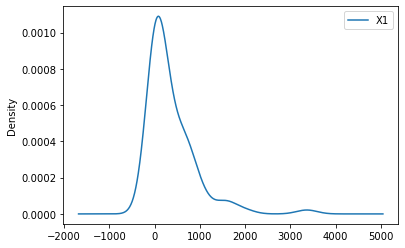

In [233]:
plt.figure(figsize= (10,7))
#Creating dataframe from the X1 feature 
limit_count=pd.DataFrame(dataframe['X1'].value_counts())
#Top 10 frequency of X1 Feature
print(limit_count.head(10))
#Density plot of count
limit_count.plot(kind='kde')

### 
    Most of the count fall between 1 to 1000, let,s add percentage feature in limit count dataframe

In [77]:
limit_count['Percentage']= (limit_count['X1']*100)/30000
limit_count.head(10)

,X1,Percentage
50000,3365,11.216667
20000,1976,6.586667
30000,1610,5.366667
80000,1567,5.223333
200000,1528,5.093333
150000,1110,3.700000
100000,1048,3.493333
180000,995,3.316667
360000,881,2.936667
60000,825,2.750000


### 
    50000 holds highest percentage followed by 20000 with 6.58. Now we are going to divide balance limit in 3 categories.
    1- Lower Limit that have less than or equal to 100000 balance limit.
    2- Upper Limit that have more than or equal to 200000 balance limit.
    3- Middle Limit that is in between Lower Limit and Upper Limit

In [61]:
lower_limit=(len(dataframe.loc[dataframe['X1']<=100000, 'X1'])*100)/30000
upper_limit= (len(dataframe.loc[dataframe['X1']>=200000, 'X1'])*100)/30000
middle_limit= 100- (lower_limit+upper_limit)
print('Credit cards that have less than or equal to 1 lakh balance limit: ', lower_limit)
print('Credit cards that have more than or equal to 2 lakh balance limit: ', upper_limit)
print('Middle Limit', middle_limit)


Credit cards that have less than or equal to 1 lakh balance limit:  41.66
Credit cards that have more than or equal to 2 lakh balance limit:  37.166666666666664
Middle Limit 21.173333333333346


### 
    Plotting all the feature individually to see their distribution

/Users/kumargaurav/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


<Figure size 720x504 with 0 Axes>

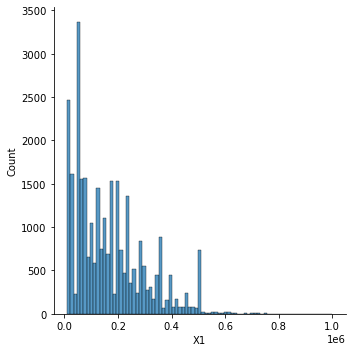

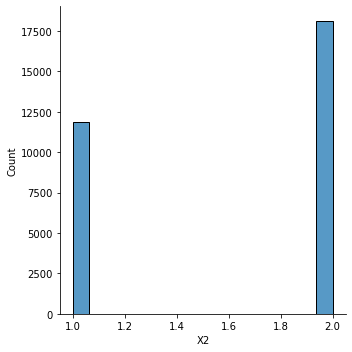

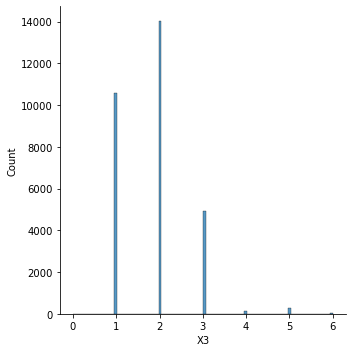

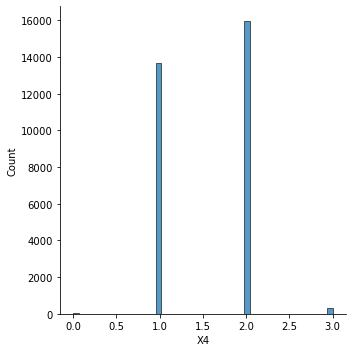

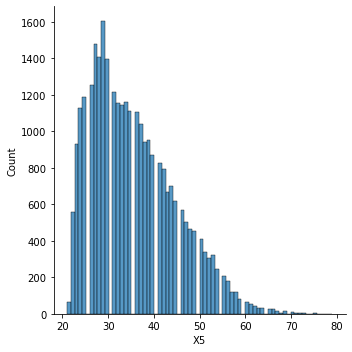

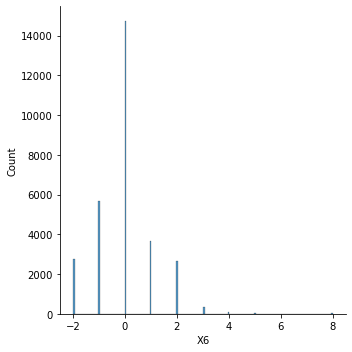

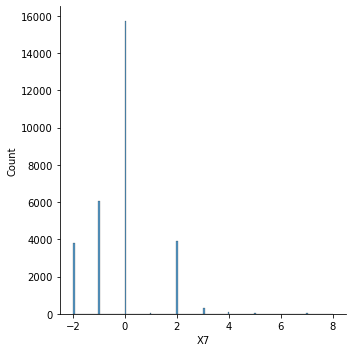

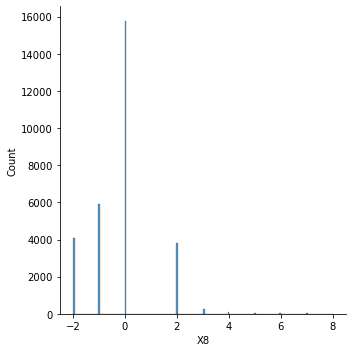

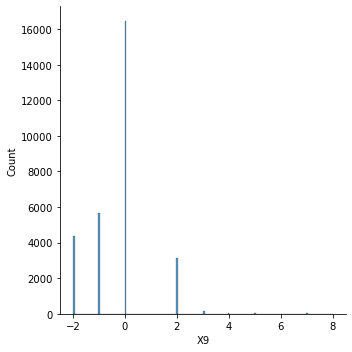

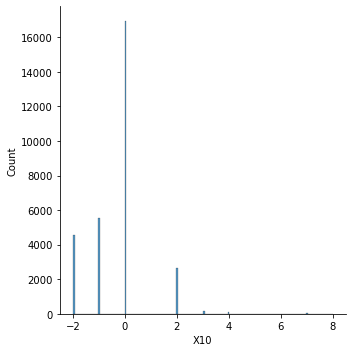

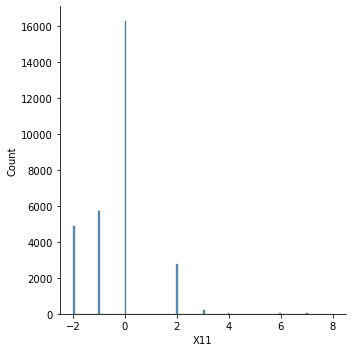

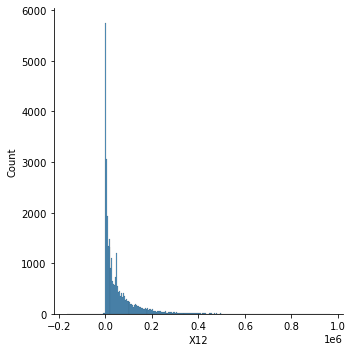

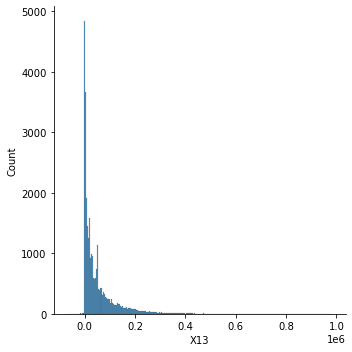

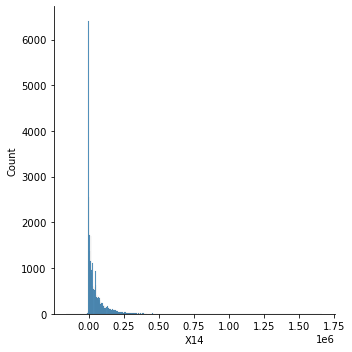

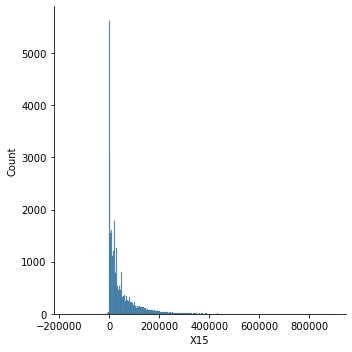

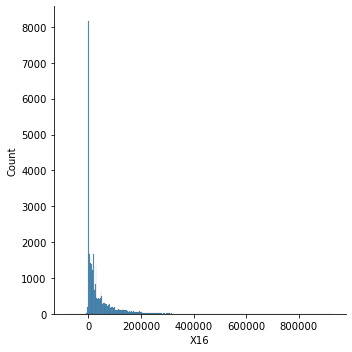

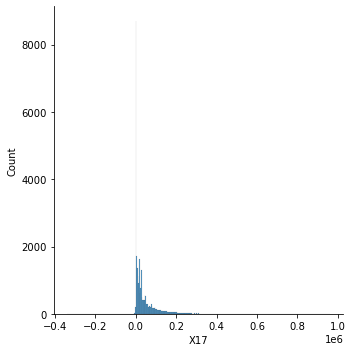

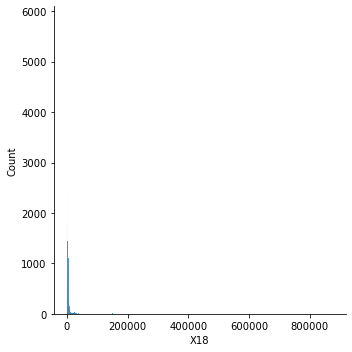

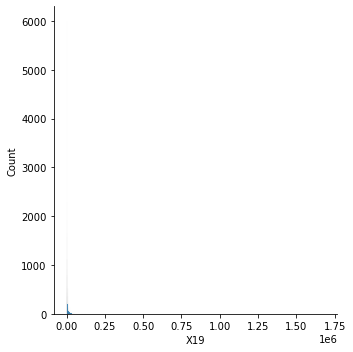

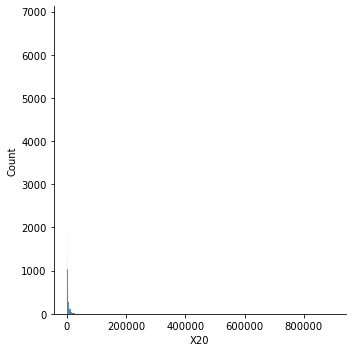

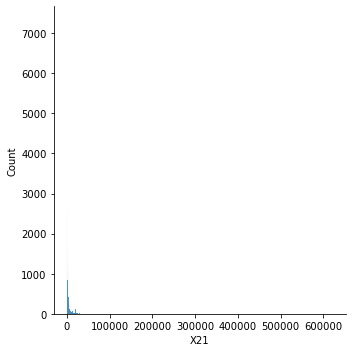

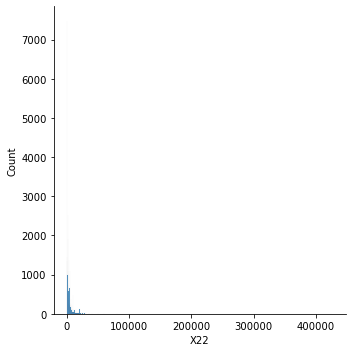

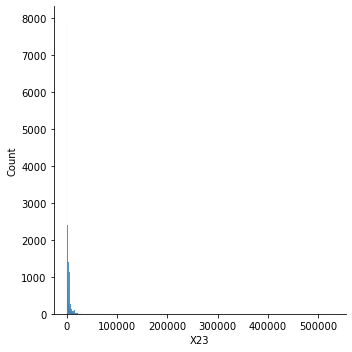

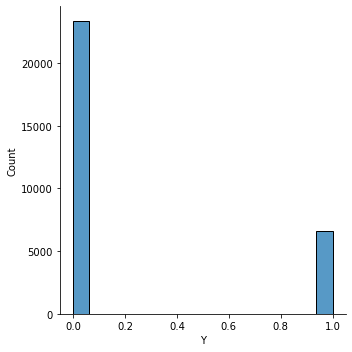

In [234]:
plt.figure(figsize= (10,7))
for column in dataframe:
    sns.displot(data= dataframe, x= column)

### X2(Sex) Feature:
    X2 feature denotes to Sex
    

#### 
     Sex and their balance limit
         First calculate the percentage of Male and Female. 

In [108]:
dataframe['X2'].value_counts()

2    18112
1    11888
Name: X2, dtype: int64

In [117]:
female= 18112*100/30000
male= 11888*100/30000
print('Percentage of Female: ', female)
print('Percentage of Male: ', male)

Percentage of Female:  60.373333333333335
Percentage of Male:  39.626666666666665


In [116]:
# Lower Limit
print(len(dataframe.loc[(dataframe['X2']==1) & (dataframe['X1']<=100000), 'X1'])*100/30000)
print(len(dataframe.loc[(dataframe['X2']==2) & (dataframe['X1']<=100000), 'X1'])*100/30000)

# Upper Limit
print(len(dataframe.loc[(dataframe['X2']==1) & (dataframe['X1']>=200000), 'X1'])*100/30000)
print(len(dataframe.loc[(dataframe['X2']==2) & (dataframe['X1']>=200000), 'X1'])*100/30000)

17.856666666666666
23.803333333333335
14.253333333333334
22.913333333333334


### 
    17.85% Male credit card that have <=100000 balance limit
    23.85% Female credit card that have <=100000 balance limit
    14.8% Male credit card that have >=200000 balance limit
    22.91% Female credit card that have >=200000 balance limit

In [162]:
print('% Female having default payment: ',len(dataframe.loc[(dataframe['X2']==1) &  (dataframe['Y']==1)])*100/30000)
print('% Male having default payment: ',len(dataframe.loc[(dataframe['X2']==2) &  (dataframe['Y']==1)])*100/30000)

% Female having default payment:  9.576666666666666
% Male having default payment:  12.543333333333333


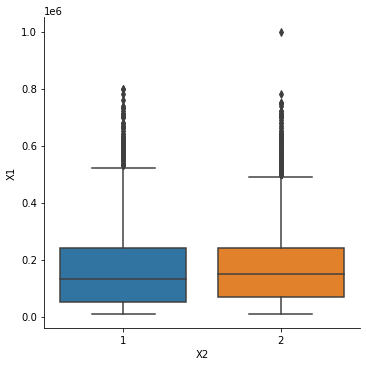

In [102]:
sns.catplot(data= dataframe, x='X2', y='X1', kind='box')

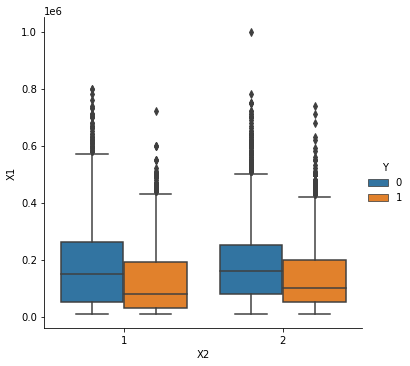

In [104]:
# Adding target Variable to this plot.
sns.catplot(data= dataframe, x='X2', y='X1', hue='Y', kind='box')

### 
    Target variable is binary so we can plot Categorical plot with these feature with label(Y). Now, observe first feature X1 that is balance limit with label

### X3(Education) Feature:
    X3 Feature denotes to Education

In [122]:
print(dataframe['X3'].unique())
education= pd.DataFrame(dataframe['X3'].value_counts())
education['Percentage']=education['X3']*100/30000
education['Degree']= ['University', 'Graduate-School', 'High-School', 'Other', 'Other','Other', 'Not Known']
education.head(10)

[2 1 3 5 4 6 0]


,X3,Percentage,Degree
2,14030,46.766667,University
1,10585,35.283333,Graduate-School
3,4917,16.390000,High-School
5,280,0.933333,Other
4,123,0.410000,Other
6,51,0.170000,Other
0,14,0.046667,Not Known


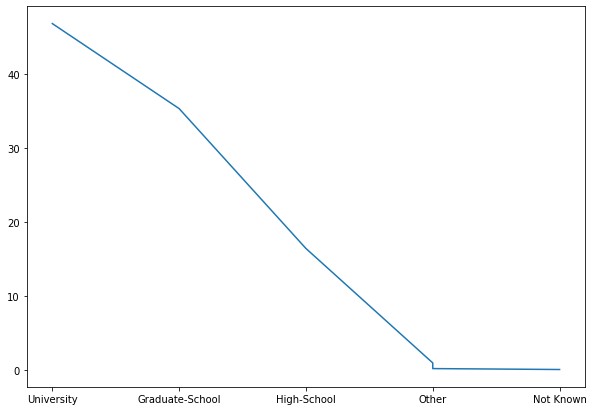

In [189]:
plt.figure(figsize=(10,7))
plt.plot(education['Degree'], education['Percentage'])

In [128]:
len(dataframe.loc[(dataframe['X2']==1) & (dataframe['X3']==2) & (dataframe['Y']==1), 'Y'])

1408

In [145]:
two=len(dataframe.loc[(dataframe['X2']==1) & (dataframe['X3']==2), 'X3'])*100/30000
one=len(dataframe.loc[(dataframe['X2']==1) & (dataframe['X3']==1), 'X3'])*100/30000
three=len(dataframe.loc[(dataframe['X2']==1) & (dataframe['X3']==3), 'X3'])*100/30000
five=len(dataframe.loc[(dataframe['X2']==1) & (dataframe['X3']==5), 'X3'])*100/30000
four=len(dataframe.loc[(dataframe['X2']==1) & (dataframe['X3']==4), 'X3'])*100/30000
six=len(dataframe.loc[(dataframe['X2']==1) & (dataframe['X3']==6), 'X3'])*100/30000
zero=len(dataframe.loc[(dataframe['X2']==1) & (dataframe['X3']==0), 'X3'])*100/30000
two

17.913333333333334

In [146]:
education['% Female_Default_Payment']=[two, one, three, five, four, six, zero]
education.head(10)

,X3,Percentage,Degree,% Female_Default_Payment
2,14030,46.766667,University,17.913333
1,10585,35.283333,Graduate-School,14.513333
3,4917,16.390000,High-School,6.633333
5,280,0.933333,Other,0.316667
4,123,0.410000,Other,0.140000
6,51,0.170000,Other,0.083333
0,14,0.046667,Not Known,0.026667


In [147]:
two=len(dataframe.loc[(dataframe['X2']==2) & (dataframe['X3']==2), 'X3'])*100/30000
one=len(dataframe.loc[(dataframe['X2']==2) & (dataframe['X3']==1), 'X3'])*100/30000
three=len(dataframe.loc[(dataframe['X2']==2) & (dataframe['X3']==3), 'X3'])*100/30000
five=len(dataframe.loc[(dataframe['X2']==2) & (dataframe['X3']==5), 'X3'])*100/30000
four=len(dataframe.loc[(dataframe['X2']==2) & (dataframe['X3']==4), 'X3'])*100/30000
six=len(dataframe.loc[(dataframe['X2']==2) & (dataframe['X3']==6), 'X3'])*100/30000
zero=len(dataframe.loc[(dataframe['X2']==2) & (dataframe['X3']==0), 'X3'])*100/30000

In [148]:
education['% Male_Default_Payment']=[two, one, three, five, four, six, zero]
education.head(10)

,X3,Percentage,Degree,% Female_Default_Payment,% Male_Default_Payment
2,14030,46.766667,University,17.913333,28.853333
1,10585,35.283333,Graduate-School,14.513333,20.770000
3,4917,16.390000,High-School,6.633333,9.756667
5,280,0.933333,Other,0.316667,0.616667
4,123,0.410000,Other,0.140000,0.270000
6,51,0.170000,Other,0.083333,0.086667
0,14,0.046667,Not Known,0.026667,0.020000


In [132]:
no=len(dataframe.loc[dataframe['Y']==0, 'Y'])*100/30000
yes=len(dataframe.loc[dataframe['Y']==1, 'Y'])*100/30000
print('% of credit card that have default payement: ', yes)
print('% of credit card that have not default payement: ', no)

% of credit card that have default payement:  22.12
% of credit card that have not default payement:  77.88


### X4(Marriage)

<AxesSubplot:>

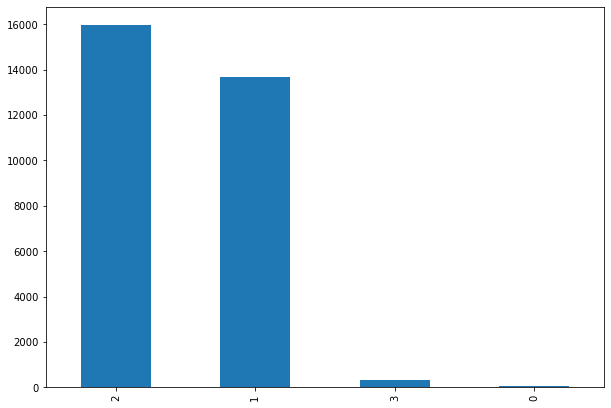

In [191]:
plt.figure(figsize=(10,7))
dataframe['X4'].value_counts().plot(kind= 'bar')

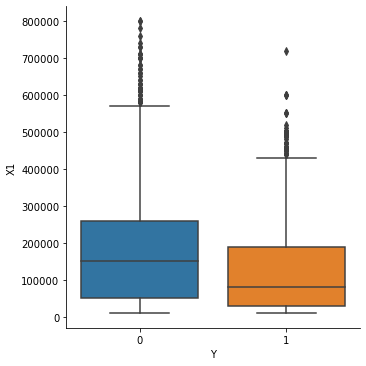

In [159]:
df=dataframe.loc[(dataframe['X2']==1) & dataframe['X4']==1, ['X1', 'Y']]
sns.catplot(data= df, x='Y', y= 'X1', kind= 'box' )

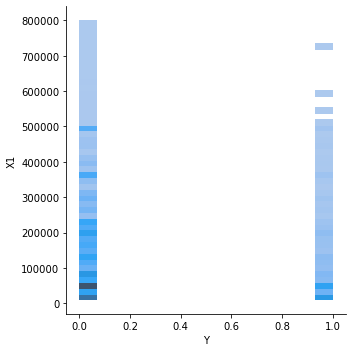

In [167]:
sns.displot(data= df, x='Y', y= 'X1' )

In [153]:
print('% of Married peopele have default payment: ',len(dataframe.loc[(dataframe['X4']==1) & (dataframe['Y']==1)])*100/30000)
print('% of Unmarried people have default payment: ',len(dataframe.loc[(dataframe['X4']==2) & (dataframe['Y']==1)])*100/30000)

% of Married peopele have default payment:  10.686666666666667
% of Unmarried people have default payment:  11.136666666666667


In [171]:
# when Sex=1
print('% of Married woman have default payment: ',len(dataframe.loc[(dataframe['X4']==1)& (dataframe['X2']==1) & (dataframe['Y']==1)])*100/30000)
print('% of Unmarried woman have default payment: ',len(dataframe.loc[(dataframe['X4']==2) &(dataframe['X2']==1) & (dataframe['Y']==1)])*100/30000)

# when Sex=2
print('% of Married Male have default payment: ',len(dataframe.loc[(dataframe['X4']==1) & (dataframe['X2']==2) & (dataframe['Y']==1)])*100/30000)
print('% of Unmarried male have default payment: ',len(dataframe.loc[(dataframe['X4']==2) &(dataframe['X2']==2) & (dataframe['Y']==1)])*100/30000)

% of Married woman have default payment:  4.486666666666666
% of Unmarried woman have default payment:  4.95
% of Married Male have default payment:  6.2
% of Unmarried male have default payment:  6.1866666666666665


### 
    Marital status is not an issue here, we can see that default payment uneffected by marriage. We can remove X4 feature during the model building from the Dataset because this not adds value to the dataset and can lead to the model overfitting.

### X5(Age):

In [172]:
dataframe['X5'].unique()

array([24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 30, 49, 39, 40, 27, 47,
       33, 32, 54, 58, 22, 25, 31, 46, 42, 43, 45, 56, 44, 53, 38, 63, 36,
       52, 48, 55, 60, 50, 75, 61, 73, 59, 21, 67, 66, 62, 70, 72, 64, 65,
       71, 69, 68, 79, 74], dtype=object)


    Distributin of Age:

<AxesSubplot:>

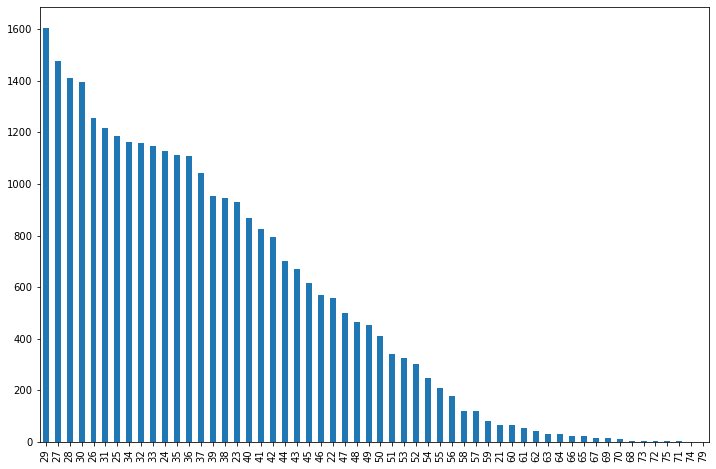

In [187]:
plt.figure(figsize=(12,8))
dataframe['X5'].value_counts().plot(kind= 'bar')

#### 
    Density plot for X5(Age)

<AxesSubplot:ylabel='Density'>

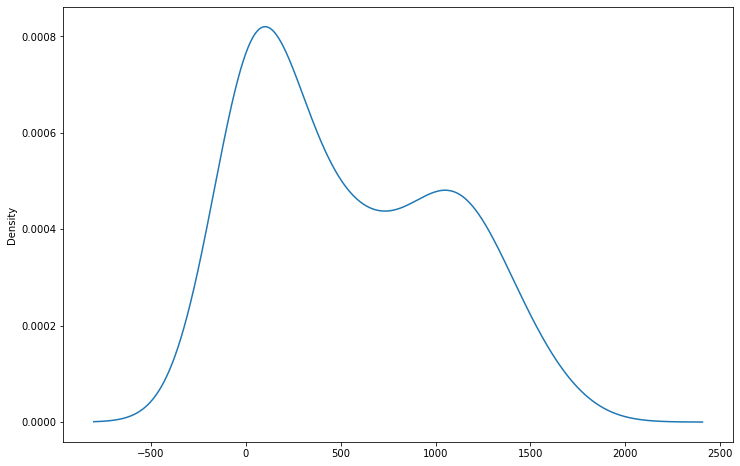

In [188]:
plt.figure(figsize=(12,8))
dataframe['X5'].value_counts().plot(kind= 'kde')

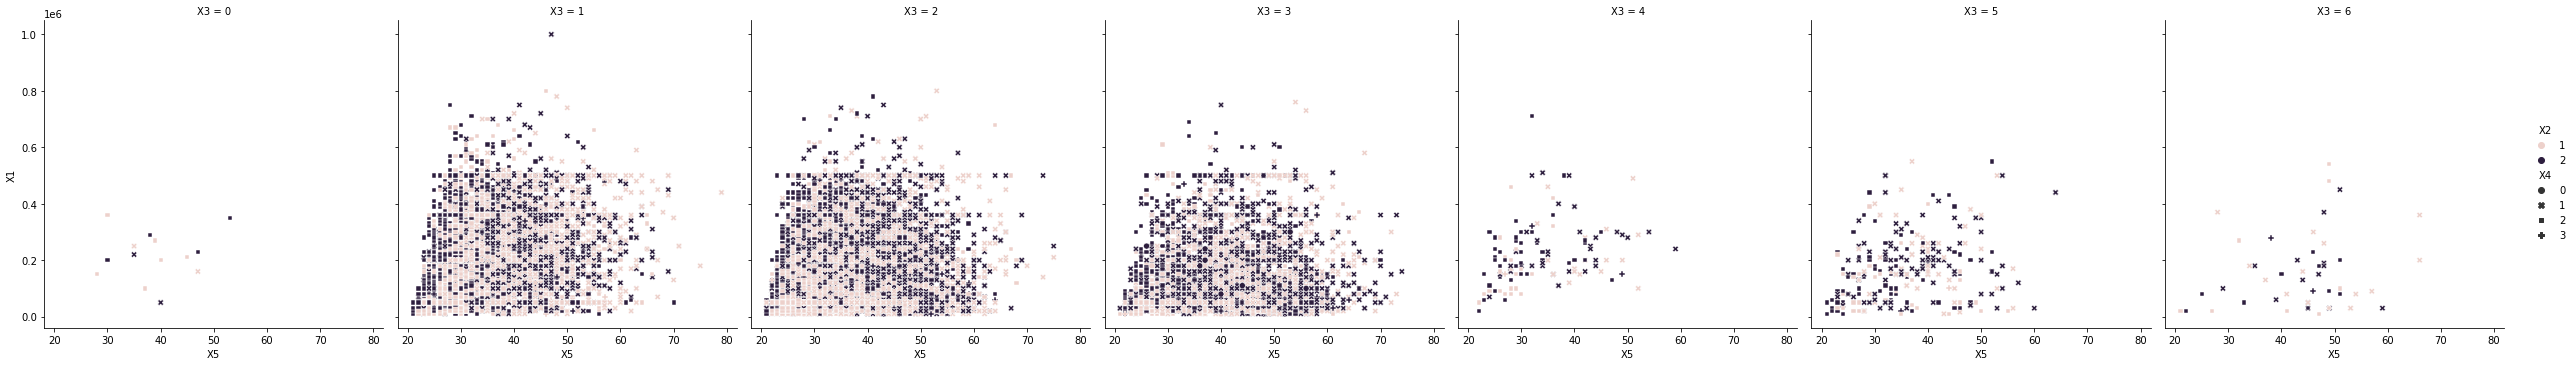

In [180]:
sns.relplot(data= dataframe, x= 'X5', y= 'X1', col='X3', hue= 'X2', style= 'X4')


    Let's take the mean of the age:

In [201]:
dataframe['X5'].mean()

35.4855

### 
    Default payment of Female and Male whose age is >=35

In [199]:
print(len(dataframe.loc[(dataframe['X2']==1) & (dataframe['X5']<=35) & (dataframe['Y']==1)])*100/30000, '% Female')
print(len(dataframe.loc[(dataframe['X2']==2) & (dataframe['X5']<=35) & (dataframe['Y']==1)])*100/30000, '% Male')

4.72 % Female
7.27 % Male



    Default payment of Female and Male whose ase is >35

In [200]:
print(len(dataframe.loc[(dataframe['X2']==1) & (dataframe['X5']>35) & (dataframe['Y']==1)])*100/30000, '% Female')
print(len(dataframe.loc[(dataframe['X2']==2) & (dataframe['X5']>35) & (dataframe['Y']==1)])*100/30000, '% Male')

4.8566666666666665 % Female
5.273333333333333 % Male


### 
    Male that have age below 36 is having more default payment than the male whose age ig more than 35, but in the case of female we can see that both are nearly same 

### Feature X6 to X11:
    These feature tracks the previous repayment

In [202]:
dataframe['X6'].unique()

array([2, -1, 0, -2, 1, 3, 4, 8, 7, 5, 6], dtype=object)

<AxesSubplot:>

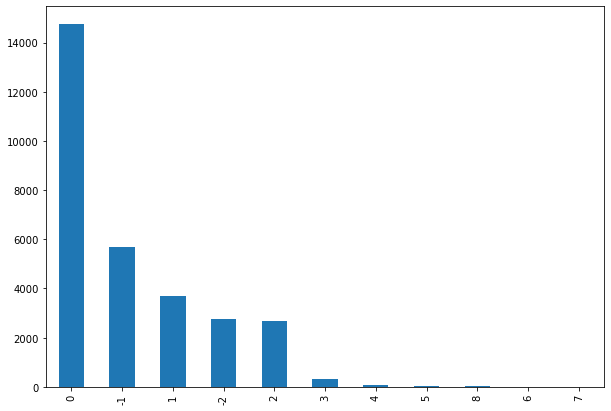

In [207]:
plt.figure(figsize=(10,7))
dataframe['X6'].value_counts().plot(kind='bar')

In [211]:
x6=pd.DataFrame(dataframe['X6'].value_counts())
x6['Percentage']= x6['X6']*100/30000
x6

,X6,Percentage
0,14737,49.123333
-1,5686,18.953333
1,3688,12.293333
-2,2759,9.196667
2,2667,8.890000
3,322,1.073333
4,76,0.253333
5,26,0.086667
8,19,0.063333
6,11,0.036667


#### X7 Feature

<AxesSubplot:>

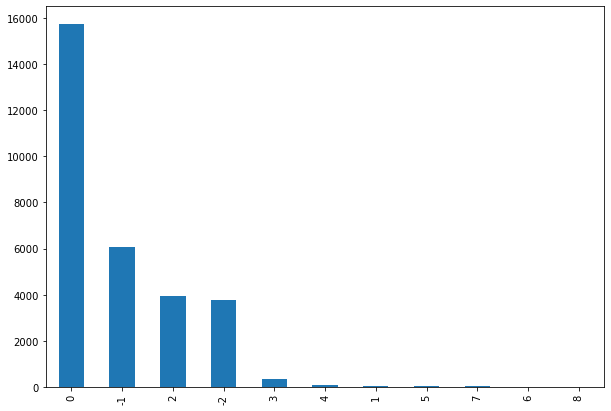

In [213]:
plt.figure(figsize=(10,7))
dataframe['X7'].value_counts().plot(kind= 'bar')

In [215]:
x7=pd.DataFrame(dataframe['X7'].value_counts())
x7['Percentage']=x7['X7']*100/30000
x7

,X7,Percentage
0,15730,52.433333
-1,6050,20.166667
2,3927,13.090000
-2,3782,12.606667
3,326,1.086667
4,99,0.330000
1,28,0.093333
5,25,0.083333
7,20,0.066667
6,12,0.040000


#### X8 Feature:


Distribution plot of X8 Feature 



<AxesSubplot:>

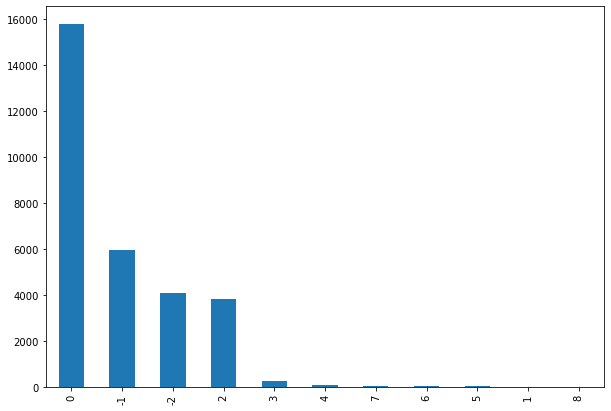

In [224]:
print('Distribution plot of X8 Feature \n')
plt.figure(figsize= (10,7))
dataframe['X8'].value_counts().plot(kind= 'bar')

In [225]:
x8=pd.DataFrame(dataframe['X8'].value_counts())
x8['Percentage']= x8['X8']*100/30000
x8

,X8,Percentage
0,15764,52.546667
-1,5938,19.793333
-2,4085,13.616667
2,3819,12.730000
3,240,0.800000
4,76,0.253333
7,27,0.090000
6,23,0.076667
5,21,0.070000
1,4,0.013333


#### X9 Feature

Distribution plot of X9 Feature 



<AxesSubplot:>

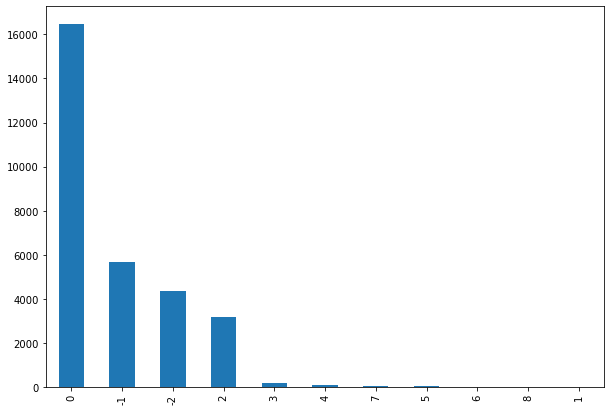

In [226]:
print('Distribution plot of X9 Feature \n')
plt.figure(figsize= (10,7))
dataframe['X9'].value_counts().plot(kind= 'bar')

In [227]:
x9=pd.DataFrame(dataframe['X9'].value_counts())
x9['Percentage']= x9['X9']*100/30000
x9

,X9,Percentage
0,16455,54.850000
-1,5687,18.956667
-2,4348,14.493333
2,3159,10.530000
3,180,0.600000
4,69,0.230000
7,58,0.193333
5,35,0.116667
6,5,0.016667
8,2,0.006667


#### X10 Feature:

Distribution plot of X10 Feature 



<AxesSubplot:>

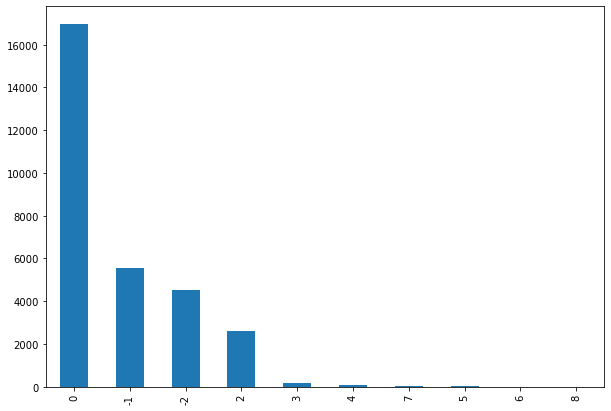

In [228]:
print('Distribution plot of X10 Feature \n')
plt.figure(figsize= (10,7))
dataframe['X10'].value_counts().plot(kind= 'bar')

In [229]:
x10=pd.DataFrame(dataframe['X10'].value_counts())
x10['Percentage']= x10['X10']*100/30000
x10

,X10,Percentage
0,16947,56.490000
-1,5539,18.463333
-2,4546,15.153333
2,2626,8.753333
3,178,0.593333
4,84,0.280000
7,58,0.193333
5,17,0.056667
6,4,0.013333
8,1,0.003333


#### X11 Feature:

Distribution plot of X11 Feature 



<AxesSubplot:>

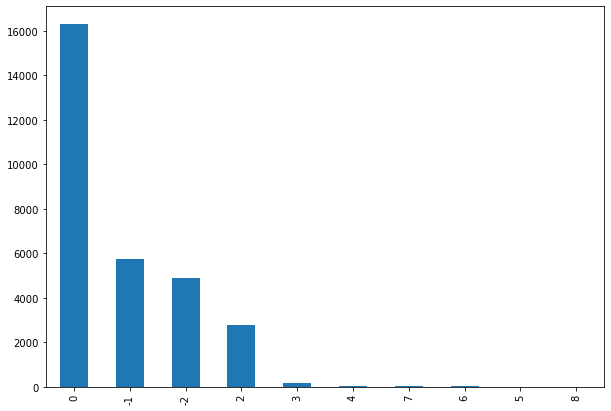

In [230]:
print('Distribution plot of X11 Feature \n')
plt.figure(figsize= (10,7))
dataframe['X11'].value_counts().plot(kind= 'bar')

In [231]:
x11=pd.DataFrame(dataframe['X11'].value_counts())
x11['Percentage']= x11['X11']*100/30000
x11

,X11,Percentage
0,16286,54.286667
-1,5740,19.133333
-2,4895,16.316667
2,2766,9.220000
3,184,0.613333
4,49,0.163333
7,46,0.153333
6,19,0.063333
5,13,0.043333
8,2,0.006667


### 
    After analysing feature X6, X7, X8, X9 ,X10 and X11 we found pattern:
    1- More than 50% of payment have been done in month 0.
    2- Nearly 20% of payment have been done in month -1.
    3- 15%+ payment have been done in month -2.
    4- Nearly 9% of payement have been done in month 2.
    5 less than 1% of payment have been done in month 3,4,5,6,7 and 8.

### 
    Plotting a relation plot between X1 and X5, column(col) is X2, row is Y, hue(color) is X4 and size is X7

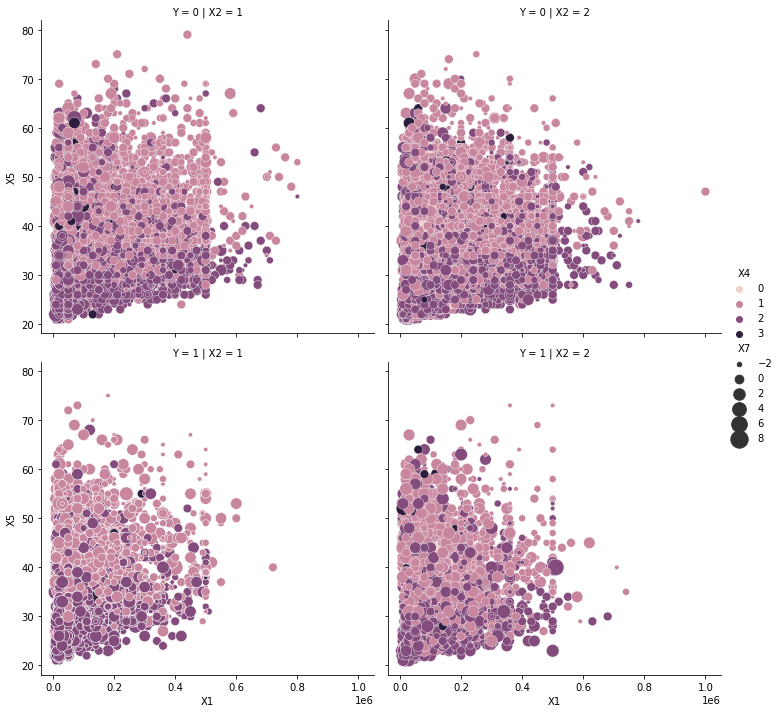

In [223]:
sns.relplot(data= dataframe, x= 'X1', y='X5', size='X7', col='X2',row= 'Y', hue='X4', sizes= (20,300))

### Feature X12, X13, X14, X15, X16, X17
    Thease Feature describe about amoutn of bill statement in differnet month. Dataset description have not provided much information about these feature, so it is difficult to analyze these feature also i don't have to much knowledge about this domain. So let's expore some basic stat about these feature:

#### X12 Feature:
    Amount of bill statement in September 2005

In [245]:
len(dataframe.loc[(dataframe['X12']<0)])*100/30000

1.9666666666666666

### 
    Nearly 2% people exhausted the credit card limit.

In [247]:
len(dataframe.loc[(dataframe['X12']<0) & (dataframe['Y']==1)])*100/30000

0.36333333333333334

### 
    Out of 2%  only 0.36% credit card who have exhausted the limit have default payment

In [250]:
len(dataframe.loc[(dataframe['X12']==0) & (dataframe['Y']==1)])*100/30000

1.78

### 
    1.8% credit card who have default payment but did not use the credit card for anyting.

In [251]:
len(dataframe.loc[(dataframe['X12']>0) & (dataframe['Y']==1)])*100/30000

19.976666666666667

### 
    Nearly 20% credit card who have not exhausted the limit have default payment

In [254]:
len(dataframe.loc[(dataframe['X12']>0) & (dataframe['Y']==0)])*100/30000

71.36333333333333

### 
    71% who did not exhausted the limit did not have default payment.

#### X13 Feature:
    Amount of bill statement in August 2005

In [258]:
print(len(dataframe.loc[(dataframe['X13']<0)])*100/30000)
len(dataframe.loc[(dataframe['X13']<0) & (dataframe['Y']==1)])*100/30000

2.23


0.42333333333333334

### 
    2.23% credit card exhausted the limit and out of this 0.42% have default payment.

In [261]:
print(len(dataframe.loc[(dataframe['X13']==0) & (dataframe['Y']==1)])*100/30000)
print(len(dataframe.loc[(dataframe['X13']>0) & (dataframe['Y']==1)])*100/30000)
len(dataframe.loc[(dataframe['X13']>0) & (dataframe['Y']==0)])*100/30000

2.0566666666666666
19.64


69.77666666666667

### 
    2% of credit card that have default payment did not use it.
    Nearly 20% credit card did not exhausted and have default payment.
    nearly 70% credit card did not exhausted and did not have default payment.

#### X14 Feature:
    Amount of bill statement in july 2005:

In [262]:
print(len(dataframe.loc[(dataframe['X14']<0)])*100/30000)
len(dataframe.loc[(dataframe['X14']<0) & (dataframe['Y']==1)])*100/30000

2.183333333333333


0.43

### 
    2.18% credit card exhausted the limit and out of this 0.43% have default payment.

In [263]:
print(len(dataframe.loc[(dataframe['X14']==0) & (dataframe['Y']==1)])*100/30000)
print(len(dataframe.loc[(dataframe['X14']>0) & (dataframe['Y']==1)])*100/30000)
len(dataframe.loc[(dataframe['X14']>0) & (dataframe['Y']==0)])*100/30000

2.3
19.39


68.86

### 
    2.3% of credit card that have default payment did not use it.
    Nearly 19.4% credit card did not exhausted and have default payment.
    Nearly 69% credit card did not exhausted and did not have default payment.

#### X15 Feature:
    Amount of bill statement in June 2005:

In [265]:
print(len(dataframe.loc[(dataframe['X15']<0)])*100/30000)
len(dataframe.loc[(dataframe['X15']<0) & (dataframe['Y']==1)])*100/30000

2.25


0.3933333333333333

### 
    2.25% credit card exhausted the limit and out of this 0.39% have default payment.

In [266]:
print(len(dataframe.loc[(dataframe['X15']==0) & (dataframe['Y']==1)])*100/30000)
print(len(dataframe.loc[(dataframe['X15']>0) & (dataframe['Y']==1)])*100/30000)
len(dataframe.loc[(dataframe['X15']>0) & (dataframe['Y']==0)])*100/30000

2.6033333333333335
19.123333333333335


67.97666666666667

### 
    2.3% of credit card that have default payment did not use it.
    19% credit card did not exhausted and have default payment.
    Nearly 68% credit card did not exhausted and did not have default payment.

#### X16 Feature:
    Amount of bill statement in May 2005:

In [267]:
print(len(dataframe.loc[(dataframe['X16']<0)])*100/30000)
len(dataframe.loc[(dataframe['X16']<0) & (dataframe['Y']==1)])*100/30000

2.183333333333333


0.43333333333333335

### 
    2.18% credit card exhausted the limit and out of this 0.43% have default payment.

In [268]:
print(len(dataframe.loc[(dataframe['X16']==0) & (dataframe['Y']==1)])*100/30000)
print(len(dataframe.loc[(dataframe['X16']>0) & (dataframe['Y']==1)])*100/30000)
len(dataframe.loc[(dataframe['X16']>0) & (dataframe['Y']==0)])*100/30000

2.8833333333333333
18.803333333333335


67.32666666666667

### 
    2.3% of credit card that have default payment did not use it.
    18.8% credit card did not exhausted and have default payment.
    67.32% credit card did not exhausted and did not have default payment.

#### X17 Feature:
    Amount of bill statement in April 2005.

In [269]:
print(len(dataframe.loc[(dataframe['X17']<0)])*100/30000)
len(dataframe.loc[(dataframe['X17']<0) & (dataframe['Y']==1)])*100/30000

2.2933333333333334


0.44333333333333336

### 
    2.29% credit card exhausted the limit and out of this 0.44% have default payment.

In [270]:
print(len(dataframe.loc[(dataframe['X17']==0) & (dataframe['Y']==1)])*100/30000)
print(len(dataframe.loc[(dataframe['X17']>0) & (dataframe['Y']==1)])*100/30000)
len(dataframe.loc[(dataframe['X17']>0) & (dataframe['Y']==0)])*100/30000

3.1766666666666667
18.5


65.80666666666667

### 
    3.17% of credit card that have default payment did not use it.
    18.5% credit card did not exhausted limit and have default payment.
    65.8% credit card did not exhausted limit and did not have default payment.

### Feature X18, X19, X20, X21, X22, X23
    X18>>>>> September
    X19>>>>> August
    X20>>>>> July
    X21>>>>> June
    X22>>>>> May
    X23>>>>> April

#### X18 Feature:
    Amount of bill statement paid in September of previous month

In [271]:
len(dataframe['X18'].unique())

7943

#### 
    Plotting the data of September month bill amount vs bill paid of credit card that have default payment

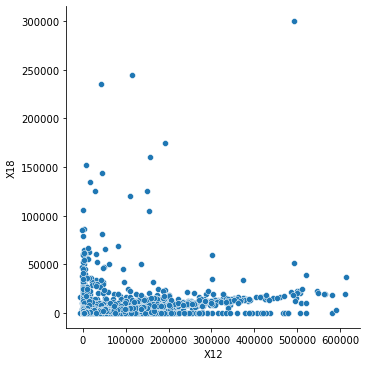

In [272]:
sep=dataframe.loc[(dataframe['Y']==1), ['X12', 'X18']]
sns.relplot(data= sep, x= 'X12', y= 'X18')

### 
    We can clearly see that some credit card did not paid tha total bill in the September month.
    Let's see how many % credit card did not clear the dues in the September month

In [273]:
sep['Remain']=sep['X12']- sep['X18']
len(sep.loc[sep['Remain']>0])*100/30000

17.976666666666667

In [275]:
sep.head()

,X12,X18,Remain
1,3913,0,3913
2,2682,0,2682
14,65802,3200,62602
17,15376,3200,12176
22,316,316,0


### 
    Data show that nearly 18% credit card did not clear their due in september month but it is not accurate data because we don't know the limit of every credit card. Near about 2% credit card exhausted their limit but it did not show the full amount generated in september month.
    
    Sep dataframe contains three Feature X12, X18 and Remain, remain feature hold the remaining payment of september month after payment

### 
                Plotting the data of September month bill amount vs bill paid of credit card that did not 
                have default payment

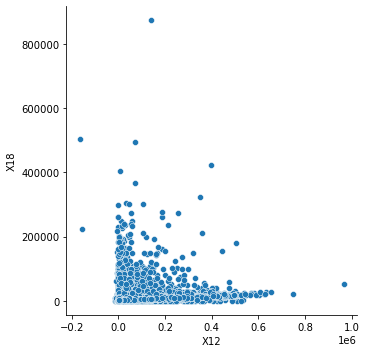

In [276]:
sep_0=dataframe.loc[(dataframe['Y']==0), ['X12', 'X18']]
sns.relplot(data= sep_0, x= 'X12', y= 'X18')

### 
    Let's see how many % credit card did not clear the dues in the September month

In [278]:
sep_0['Remain']=sep_0['X12']- sep_0['X18']
len(sep_0.loc[sep_0['Remain']>0])*100/30000

60.46

### 
    So 60.46% credit card din't clear their dues in september month who have not default payment.
    Let's see some examples.

In [279]:
sep_0

,X12,X18,Remain
3,29239,1518,27721
4,46990,2000,44990
5,8617,2000,6617
6,64400,2500,61900
7,367965,55000,312965
...,...,...,...
29991,138325,6000,132325
29993,8802,2000,6802
29994,3042,2000,1042
29996,188948,8500,180448


#### X18 Feature:
    Amount of bill statement paid in August of previous month

### 
    Plotting the data of August month bill amount vs bill paid of credit card that have default payment

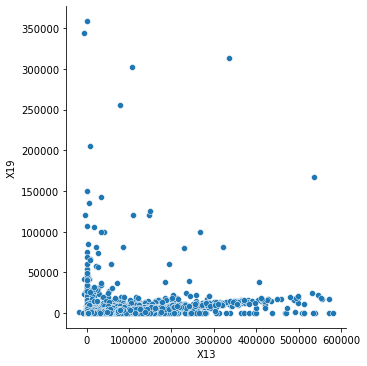

In [282]:
aug_1=dataframe.loc[(dataframe['Y']==1), ['X13', 'X19']]
sns.relplot(data= aug_1, x= 'X13', y= 'X19')

In [283]:
aug_1['Remain']=aug_1['X13']- aug_1['X19']
len(aug_1.loc[aug_1['Remain']>0])*100/30000

17.69333333333333

### 
    17.69% credit card did not clear their dues who have defaut payment.
    For instance observe below dataframe.

In [284]:
aug_1

,X13,X19,Remain
1,3102,689,2413
2,1725,1000,725
14,67369,0,67369
17,18010,0,18010
22,316,316,0
...,...,...,...
29992,2500,0,2500
29995,77708,3500,74208
29998,3356,0,3356
29999,78379,3409,74970


### 
     Plotting the data of August month bill amount vs bill paid of credit card that did not 
     have default payment

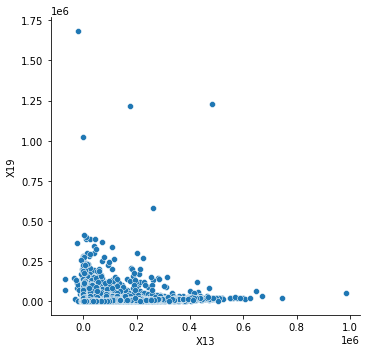

In [285]:
aug_0=dataframe.loc[(dataframe['Y']==0), ['X13', 'X19']]
sns.relplot(data= aug_0, x= 'X13', y= 'X19')

In [287]:
aug_0['Remain']=aug_0['X13']- aug_0['X19']
len(aug_0.loc[aug_0['Remain']>0])*100/30000

58.86666666666667

### 
    58.86% did not clear the due of August month who did not have default payment.

In [288]:
aug_0

,X13,X19,Remain
3,14027,1500,12527
4,48233,2019,46214
5,5670,36681,-31011
6,57069,1815,55254
7,412023,40000,372023
...,...,...,...
29991,137142,7000,130142
29993,10400,0,10400
29994,1427,111784,-110357
29996,192815,20000,172815
